## Homework 3

Dataset used in this project: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality


Part 1

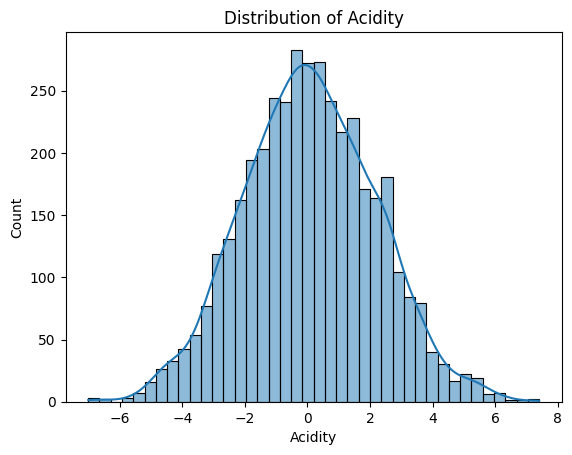

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'tau'}>, <Axes: title={'center': 'tau'}>]],
      dtype=object)

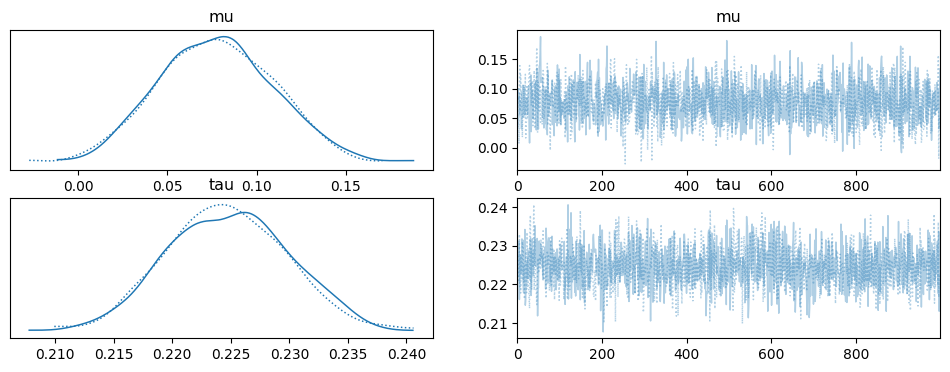

In [ ]:
import pandas as pd
import seaborn as sns
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

#Load the dataset
df = pd.read_csv('/content/apple_quality.csv')

# Clean data
# Convert string values to numeric values
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')
# Remove NA values
df = df.dropna(subset=['Acidity'])

# Plot he distribution of acidity
sns.histplot(df['Acidity'], kde=True)
plt.title('Distribution of Acidity')
plt.show()

# Perform PyMC normal-gamma specification
with pm.Model() as normal_gamma_model:
    # Priors for mean and tau
    mu = pm.Normal('mu', mu=df['Acidity'].mean(), sigma=df['Acidity'].std())
    tau = pm.Gamma('tau', alpha=2, beta=1)

    # Likelihood
    obs = pm.Normal('obs', mu=mu, sigma=tau**-0.5, observed=df['Acidity'])

# MCMC sampling
with normal_gamma_model:
    trace = pm.sample(1000, tune=1000)

pm.summary(trace)
pm.plot_trace(trace)


Part 2

array([<Axes: title={'center': 'probabilities\n0'}>,
       <Axes: title={'center': 'probabilities\n1'}>], dtype=object)

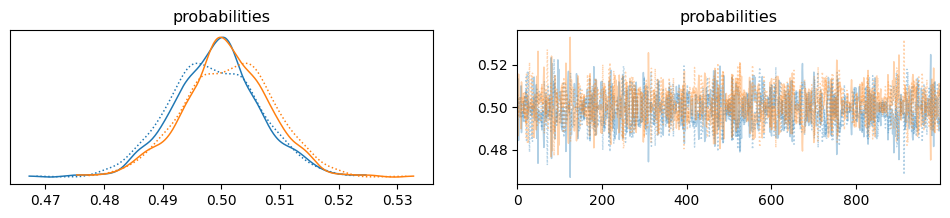

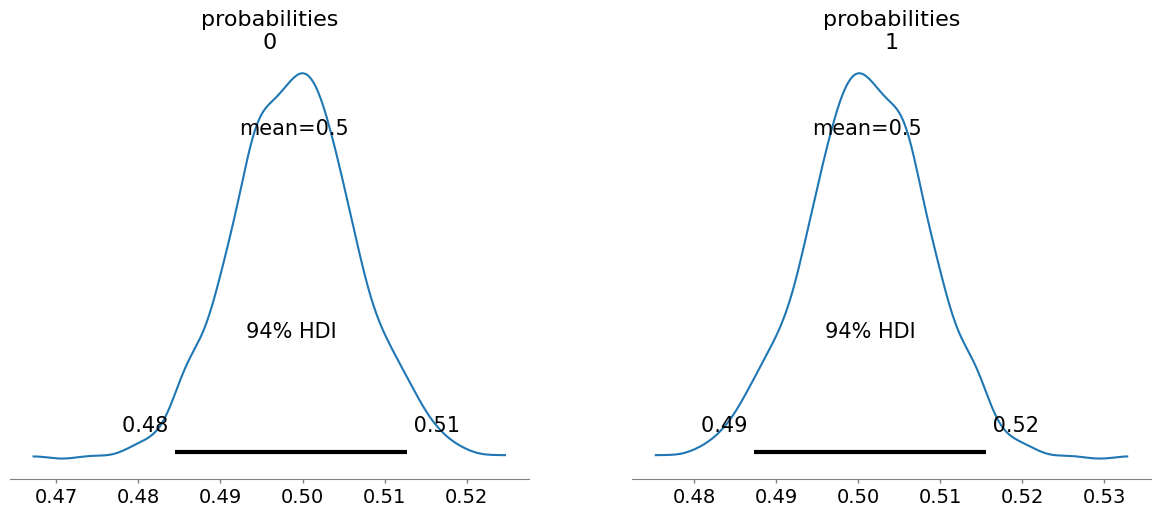

In [26]:
from sklearn.preprocessing import LabelEncoder
df['Quality'] = df['Quality'].str.lower().astype('category')
alpha_prior = np.ones(len(df['Quality'].cat.categories)) * 0.5
label_encoder = LabelEncoder()
df['QualityCode'] = label_encoder.fit_transform(df['Quality'])


# Use of Categorical Distribution
with pm.Model() as categorical_model:
    # Priors for the probabilities of each category
    probabilities = pm.Dirichlet('probabilities', a=alpha_prior)
    category = pm.Categorical('category', p=probabilities, observed=df['QualityCode'])

with categorical_model:
    trace_categorical = pm.sample(1000, tune=1000, cores=2)

pm.summary(trace_categorical)
pm.plot_trace(trace_categorical)
pm.plot_posterior(trace_categorical, var_names=['probabilities'])
